# importing libraries

In [1]:
import pandas as pd
import pyspan as ps


# Loading the file

In [9]:
# Step 1: Import Pandas and pyspan
import pandas as pd
import pyspan as ps
# Step 2: Define the file path
file_path = r"C:\Users\LENOVO\Downloads\Compressed\CoffeeShop Sales\CoffeeShop Sales.csv"

# Step 3: Load the dataset
data = pd.read_csv(file_path)

# Step 4: Display the first 5 rows
print(data.head())


   transaction_id transaction_date transaction_time  transaction_qty  \
0               1         1/1/2023          7:06:11                2   
1               2         1/1/2023          7:08:56                2   
2               3         1/1/2023          7:14:04                2   
3               4         1/1/2023          7:20:24                1   
4               5         1/1/2023          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail revenue    month  \
0  Gourmet brewed coffee            

In [12]:
df.shape
     

(149116, 17)

# Looking for null values

In [13]:
df.isnull().sum()


transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
revenue             0
month               0
month               0
weekday             0
week name           0
Hour                0
dtype: int64

In [16]:
# Step 2: Identify Missing Values
missing_data_report = df.isnull().sum()
print("Missing Data Report:\n", missing_data_report)


Missing Data Report:
 transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
revenue             0
month               0
month               0
weekday             0
week name           0
Hour                0
dtype: int64


# checking and removing the duplicate values

In [17]:
# Step 2: Check for Duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_count}")

# If there are duplicates, it will be removed 
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates have been removed.")
else:
    print("No duplicates found.")


Number of duplicate entries: 0
No duplicates found.


In [18]:
# Step 4: Check Data Types
print("Data Types:")
print(df.dtypes)

# Convert 'transaction_date' to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%m/%d/%Y')

# Convert 'revenue' to numeric by removing the dollar sign and converting to float
df['revenue'] = df['revenue'].replace({'\$': '', '': '0'}, regex=True).astype(float)

# Check the updated data types
print("Updated Data Types:")
print(df.dtypes)


<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9936\1079275336.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['revenue'] = df['revenue'].replace({'\$': '', '': '0'}, regex=True).astype(float)


Data Types:
transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
revenue              object
month                object
month                 int64
weekday               int64
week name            object
Hour                  int64
dtype: object
Updated Data Types:
transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
revenue                    float64
month                       object
month                  

# Removing unwanted columns

In [19]:
# Step 4: Remove Unwanted Columns
# Identify columns to drop (e.g., if there's a duplicate 'month' column)
columns_to_drop = ['month']  # Adjust this list based on your analysis

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Show the updated DataFrame
print("Updated DataFrame after dropping unwanted columns:")
print(df.head())


Updated DataFrame after dropping unwanted columns:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01          7:06:11                2   
1               2       2023-01-01          7:08:56                2   
2               3       2023-01-01          7:14:04                2   
3               4       2023-01-01          7:20:24                1   
4               5       2023-01-01          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  reve

In [21]:
# Step 5: Rename Columns for Clarity
df.rename(columns={
    'week name': 'week_name',
    'transaction_qty': 'transaction_quantity'
}, inplace=True)

# Show the updated DataFrame with renamed columns
print("Updated DataFrame after renaming columns:")
print(df.head())


Updated DataFrame after renaming columns:
   transaction_id transaction_date transaction_time  transaction_quantity  \
0               1       2023-01-01          7:06:11                     2   
1               2       2023-01-01          7:08:56                     2   
2               3       2023-01-01          7:14:04                     2   
3               4       2023-01-01          7:20:24                     1   
4               5       2023-01-01          7:22:41                     2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type              

# Handling Outliers

In [23]:
# Step 8: Handling Outliers using IQR method

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['unit_price'] >= lower_bound) & (df['unit_price'] <= upper_bound)]

# Print the shape of the original and cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (149116, 16)
DataFrame shape after removing outliers: (144904, 16)


In [31]:
# Store the original shape of the DataFrame
original_shape = df.shape
# Check for column names
print(df.columns.tolist())

# Remove outliers based on transaction quantity 
Q1 = df['transaction_quantity'].quantile(0.25)
Q3 = df['transaction_quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['transaction_quantity'] >= lower_bound) & (df['transaction_quantity'] <= upper_bound)]

print(f"Original DataFrame shape: {original_shape}")
print(f"DataFrame shape after removing outliers: {df.shape}")


['transaction_id', 'transaction_date', 'transaction_time', 'transaction_quantity', 'store_id', 'store_location', 'product_id', 'unit_price', 'product_category', 'product_type', 'product_detail', 'revenue', 'month ', 'weekday', 'week_name', 'Hour']
Original DataFrame shape: (149080, 16)
DataFrame shape after removing outliers: (149080, 16)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [3]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Compressed\CoffeeShop Sales\CoffeeShop Sales.csv")

# Check if the dataset loaded correctly
print(df.head())


   transaction_id transaction_date transaction_time  transaction_qty  \
0               1         1/1/2023          7:06:11                2   
1               2         1/1/2023          7:08:56                2   
2               3         1/1/2023          7:14:04                2   
3               4         1/1/2023          7:20:24                1   
4               5         1/1/2023          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail revenue    month  \
0  Gourmet brewed coffee            

In [11]:
print(f"DataFrame shape: {df.shape}")
print(df.head())  # Check if any data remains in the DataFrame


DataFrame shape: (0, 17)
Empty DataFrame
Columns: [transaction_id, transaction_date, transaction_time, transaction_qty, store_id, store_location, product_id, unit_price, product_category, product_type, product_detail, revenue, month, month , weekday, week name, Hour]
Index: []


In [14]:
# Reload the data
import pandas as pd

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Compressed\CoffeeShop Sales\CoffeeShop Sales.csv")  # Replace with the correct path
print(f"Reloaded DataFrame shape: {df.shape}")


Reloaded DataFrame shape: (149116, 17)


In [ ]:
print(df.info())  # Ensure all columns are properly typed
print(df.describe())  # Check for unusual summary statistics


# Fill missing values with defaults
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce').fillna(df['unit_price'].mean())

# Drop unnecessary columns (if needed)
df = df.drop_duplicates()

print(f"DataFrame shape after minimal cleaning: {df.shape}")


In [22]:
print(df[['revenue']].describe())
print(df[['revenue']].isnull().sum())  # Check for NaNs


        revenue
count  149116.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
revenue    0
dtype: int64


In [23]:
df['revenue'] = df['transaction_qty'] * df['unit_price']
print(df[['transaction_qty', 'unit_price', 'revenue']].head())


   transaction_qty  unit_price  revenue
0                2         3.0      6.0
1                2         3.1      6.2
2                2         4.5      9.0
3                1         2.0      2.0
4                2         3.1      6.2


# Univariate Analysis: Distribution of Revenue

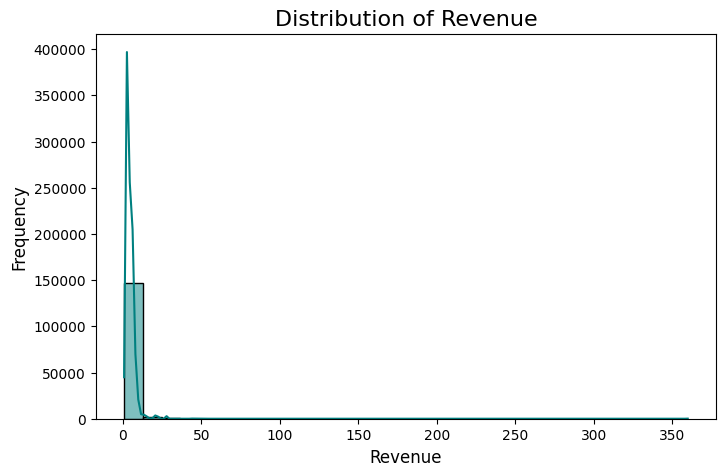

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['revenue'], kde=True, bins=30, color='teal')
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# Compare Revenue with and without Outliers

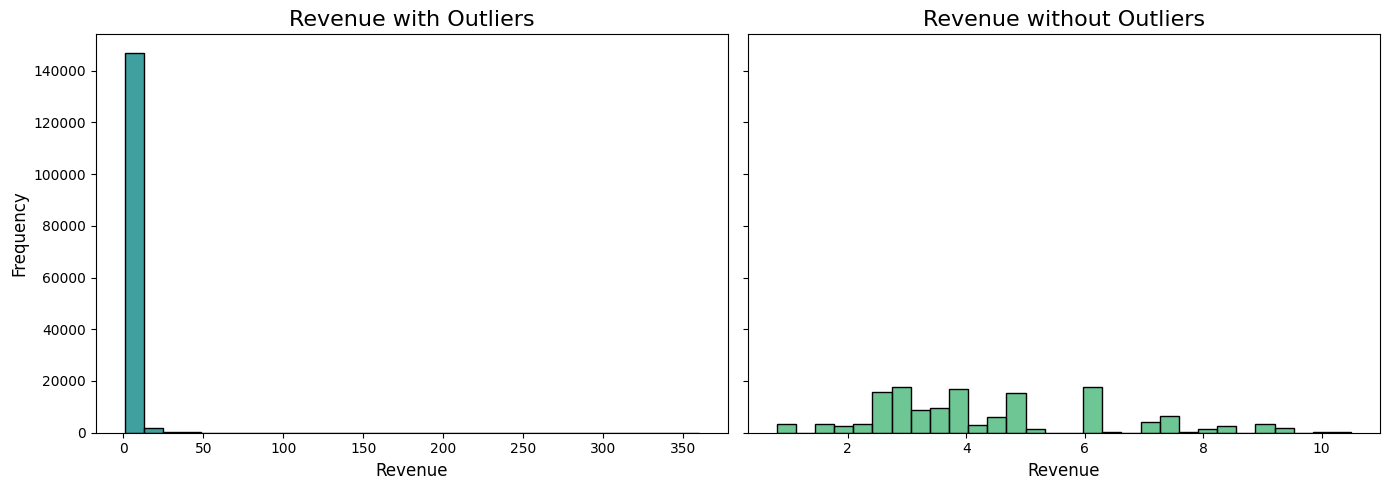

In [25]:
# Calculate IQR for revenue
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_no_outliers = df[(df['revenue'] >= Q1 - 1.5 * IQR) & (df['revenue'] <= Q3 + 1.5 * IQR)]

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(df['revenue'], bins=30, ax=axes[0], color='teal')
axes[0].set_title('Revenue with Outliers', fontsize=16)
axes[0].set_xlabel('Revenue', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df_no_outliers['revenue'], bins=30, ax=axes[1], color='mediumseagreen')
axes[1].set_title('Revenue without Outliers', fontsize=16)
axes[1].set_xlabel('Revenue', fontsize=12)

plt.tight_layout()
plt.show()


# Plot Daily Revenue Trend

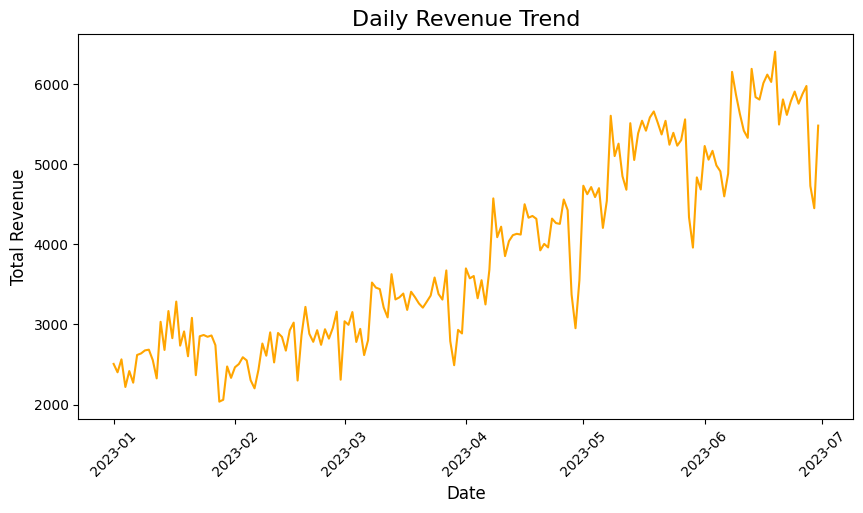

In [28]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Aggregate daily revenue
daily_revenue = df.groupby('transaction_date')['revenue'].sum().reset_index()

# Plot the daily revenue trend
plt.figure(figsize=(10, 5))
plt.plot(daily_revenue['transaction_date'], daily_revenue['revenue'], color='orange')
plt.title('Daily Revenue Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Day 4 Tasks

# Descriptive Statistics Summary

In [6]:
#Descriptive Statistics Summary of revenue and prices columns
stats = df[['transaction_qty', 'unit_price', 'revenue']].describe()
print("Descriptive Statistics:\n", stats)

# to Calculate Median 
median_values = df[['transaction_qty', 'unit_price']].median()
print("\nMedian Values:\n", median_values)

#  Calculate Mode
mode_values = df[['transaction_qty', 'unit_price']].mode()
print("\nMode Values:\n", mode_values)


Descriptive Statistics:
        transaction_qty     unit_price
count    149116.000000  149116.000000
mean          1.438276       3.382219
std           0.542509       2.658723
min           1.000000       0.800000
25%           1.000000       2.500000
50%           1.000000       3.000000
75%           2.000000       3.750000
max           8.000000      45.000000

Median Values:
 transaction_qty    1.0
unit_price         3.0
dtype: float64

Mode Values:
    transaction_qty  unit_price
0                1         3.0


In [8]:
import pandas as pd

# Sample dataframe (modify based on your actual data)
data = {'price': ['$3.00', '$3.75', '$3.25', '$4.50']}
df = pd.DataFrame(data)

# Remove dollar signs and convert to float
df['price'] = df['price'].str.replace('$', '', regex=False).astype(float)

print(df)


   price
0   3.00
1   3.75
2   3.25
3   4.50


In [13]:
import pandas as pd

# Sample DataFrame creation (replace this with your actual DataFrame)
data = {
    'transaction_id': [1, 2, 3, 4, 5],
    'transaction_date': ['1/1/2023', '1/1/2023', '1/1/2023', '1/1/2023', '1/1/2023'],
    'transaction_time': ['7:06:11', '7:08:56', '7:14:04', '7:20:24', '7:22:41'],
    'transaction_qty': [2, 2, 2, 1, 2],
    'store_id': [5, 5, 5, 5, 5],
    'store_location': ['Lower Manhattan'] * 5,
    'product_id': [32, 57, 59, 22, 57],
    'unit_price': [3.0, 3.1, 4.5, 2.0, 3.1],
    'product_category': ['Coffee', 'Tea', 'Drinking Chocolate', 'Coffee', 'Tea'],
    'product_type': ['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate', 'Drip coffee', 'Brewed Chai tea'],
    'product_detail': ['Ethiopia Rg', 'Spicy Eye Opener Chai Lg', 'Dark chocolate Lg', 'Our Old Time Diner Blend Sm', 'Spicy Eye Opener Chai Lg'],
    'revenue': ['$6.00', '$6.20', '$9.00', '$2.00', '$6.20'],
    'month': ['January'] * 5,
    'weekday': [7] * 5,
    'week': [1] * 5,
    'name': ['Sun'] * 5,
    'Hour': [7] * 5,
}

df = pd.DataFrame(data)

# Convert revenue to numeric (removing the dollar sign and converting to float)
df['revenue'] = df['revenue'].replace({r'\$': '', '': None}, regex=True).astype(float)

# Descriptive statistics for all columns
stats = df.describe(include='all')

print(stats)


        transaction_id transaction_date transaction_time  transaction_qty  \
count         5.000000                5                5         5.000000   
unique             NaN                1                5              NaN   
top                NaN         1/1/2023          7:06:11              NaN   
freq               NaN                5                1              NaN   
mean          3.000000              NaN              NaN         1.800000   
std           1.581139              NaN              NaN         0.447214   
min           1.000000              NaN              NaN         1.000000   
25%           2.000000              NaN              NaN         2.000000   
50%           3.000000              NaN              NaN         2.000000   
75%           4.000000              NaN              NaN         2.000000   
max           5.000000              NaN              NaN         2.000000   

        store_id   store_location  product_id  unit_price product_category 

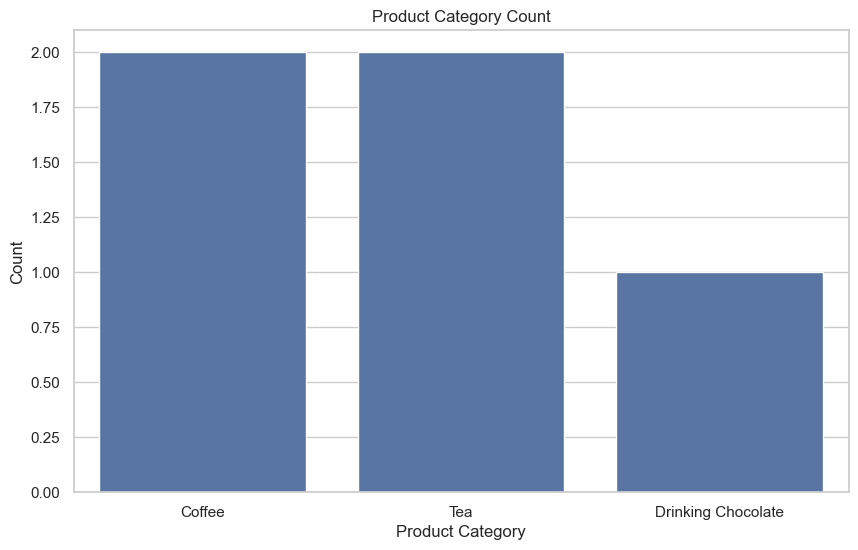

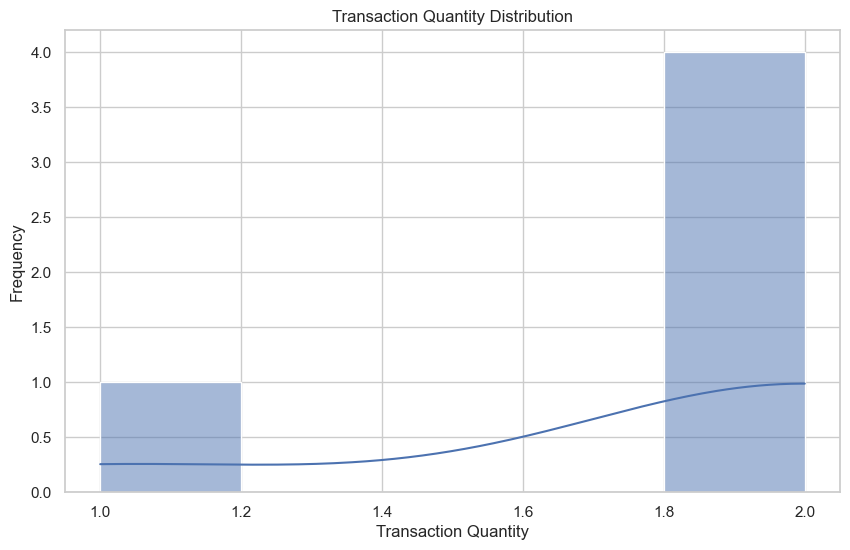

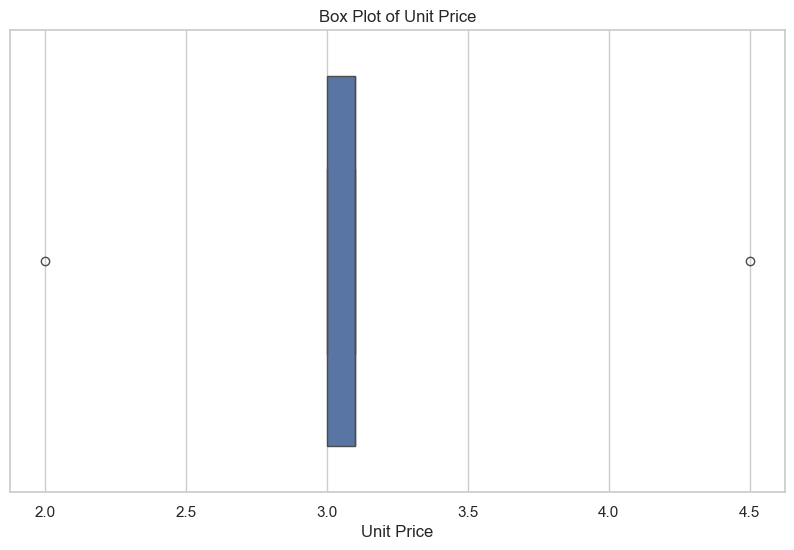

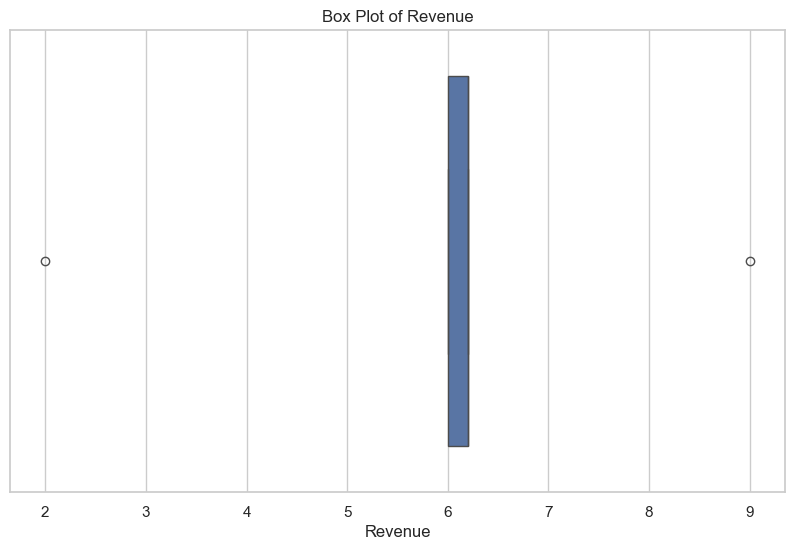

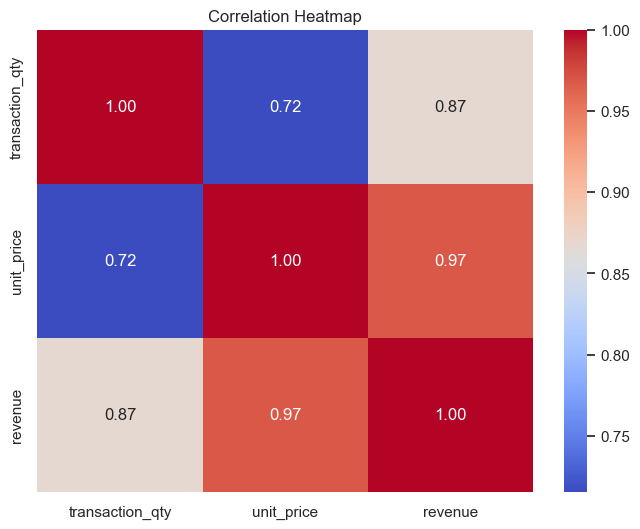

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Bar plot for product categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product_category', order=df['product_category'].value_counts().index)
plt.title('Product Category Count')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

# Histogram for transaction quantities
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_qty'], bins=5, kde=True)
plt.title('Transaction Quantity Distribution')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.show()

# Box plot for unit price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['unit_price'])
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')
plt.show()

# Box plot for revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['revenue'])
plt.title('Box Plot of Revenue')
plt.xlabel('Revenue')
plt.show()

# Correlation heatmap 
correlation_matrix = df[['transaction_qty', 'unit_price', 'revenue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
